In [46]:
import os
import sys
import numpy as np
sys.path.append('..')
import cv2
import matplotlib.pyplot as plt
from scipy import ndimage
from skimage.feature import peak_local_max
from src.annotation.preprocess import preprocess
from src.utils.watershed_utils import get_markers
from src.annotation.watershed import _peak_local_max
from omegaconf import OmegaConf

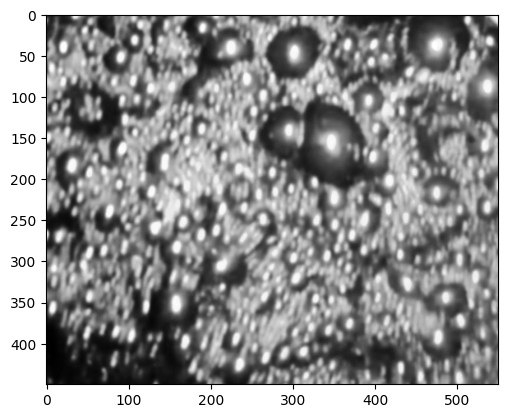

In [47]:
img = '../data/images2/train/images/0.png'
img = cv2.imread(img, 0)[50:500, 150:700]
plt.imshow(img, cmap='gray')

In [48]:
cfg = OmegaConf.load('../configs/preprocess/preprocess.yaml')

In [54]:
bin = preprocess(img, cfg)
mkr = get_markers('all', bin)
distance_map = ndimage.distance_transform_edt(mkr)
local_max = peak_local_max(distance_map, min_distance=5, labels=mkr)
peak_mask = np.zeros(distance_map.shape, dtype=bool)
peak_mask[tuple(local_max.T)] = True

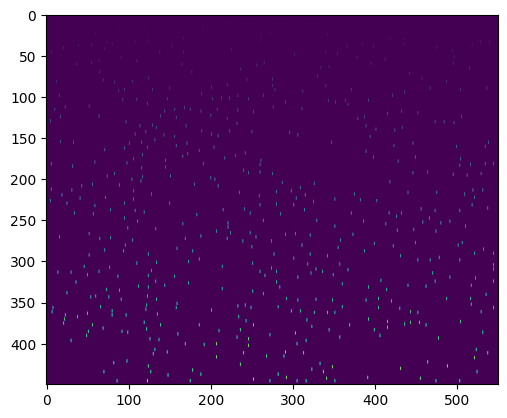

In [73]:
mask = peak_mask.astype(np.uint8) * 255
big_mask = cv2.dilate(mask, (7,7), iterations=3)

peak_markers = ndimage.label(big_mask)[0]
plt.imshow(peak_markers)

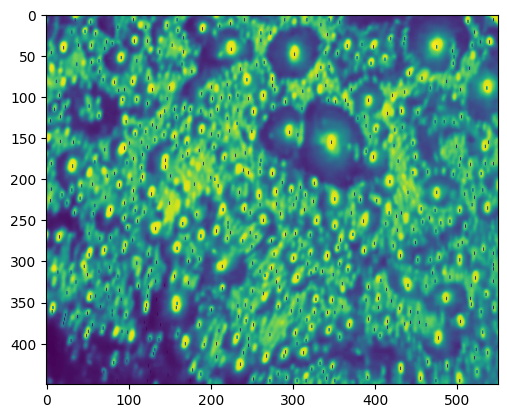

In [74]:
res = np.where(big_mask == 255, 0, img)

plt.imshow(res)